# Initial Data Exploration of Historical Product Demand
---
## Initial Idea
By separating the timestamp into year-month-date we can try to find a correlation between different parts of the yearly cycle. For example I might expect a product to be more prominently in demand during the winter, more prominently in demand at the end of the month, or more prominently in demand during certain years when that product was trending.

In [1]:
import pandas as pd #For reading in csv
df = pd.read_csv('../data/external/Historical Product Demand.csv')

In [2]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


Here I'll need to convert the date column to a usable format

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


In [5]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [6]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month,Day
0,Product_0993,Whse_J,Category_028,2012-07-27,100,2012.0,7.0,27.0
1,Product_0979,Whse_J,Category_028,2012-01-19,500,2012.0,1.0,19.0
2,Product_0979,Whse_J,Category_028,2012-02-03,500,2012.0,2.0,3.0
3,Product_0979,Whse_J,Category_028,2012-02-09,500,2012.0,2.0,9.0
4,Product_0979,Whse_J,Category_028,2012-03-02,500,2012.0,3.0,2.0


In [7]:
df['Product_Code'].unique().size

2160

Originally I thought I could possibly plot every item to see what kind of trends they have but now that I am seeing 2160 unique items. I'll try possibly graphing the product category but then I'll most likely need to settle with a correlation matrix.

In [38]:
df.drop(['Year','Month','Day','Warehouse','Product_Code'],1).groupby(['Product_Category','Date'])['Order_Demand'].sum()

Product_Category  Date      
Category_001      2011-09-27                        5 23 
                  2011-12-13                        40 1 
                  2011-12-16                    50 20 10 
                  2011-12-19                           2 
                  2011-12-20       10 10 1 1 10 1 5 25 2 
                                          ...            
Category_033      2016-12-16                 10000 10000 
                  2016-12-19           50000 10000 10000 
                  2016-12-21                 10000 10000 
                  2016-12-22    50000 100000 10000 30000 
                  2016-12-26                       10000 
Name: Order_Demand, Length: 31886, dtype: object

In [36]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                object
Year                       float64
Month                      float64
Day                        float64
dtype: object

Looks like there's a hiccup in the data. The Order_Demand column should just be numerical information but there is non-numeric data making it have an Object dtype. Cleaning up this column to only have numeric information will lead to useful summation.  
**WARNING: Some formats use various characters to indicate information such as negatives, i.e., in accounting paranthesis such as (200) may indicate negative 200. Here I am assuming non-numeric characters do not hold significant value in this dataset**

In [43]:
df['Order_Demand'] = df['Order_Demand'].str.extract('(\d+)', expand=False).astype(int) #Here I am assuming you can't play half an order of a single unit

In [44]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int32
Year                       float64
Month                      float64
Day                        float64
dtype: object

In [47]:
df_category = df.drop(['Year','Month','Day','Warehouse','Product_Code'],1).groupby(['Product_Category','Date'])['Order_Demand'].sum()
df_category

Product_Category  Date      
Category_001      2011-09-27        28
                  2011-12-13        41
                  2011-12-16        80
                  2011-12-19         2
                  2011-12-20        65
                                 ...  
Category_033      2016-12-16     20000
                  2016-12-19     70000
                  2016-12-21     20000
                  2016-12-22    190000
                  2016-12-26     10000
Name: Order_Demand, Length: 31886, dtype: int32

Perfect, now I can plot 32 lines on a graph and see how each Categories demand varies over time.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

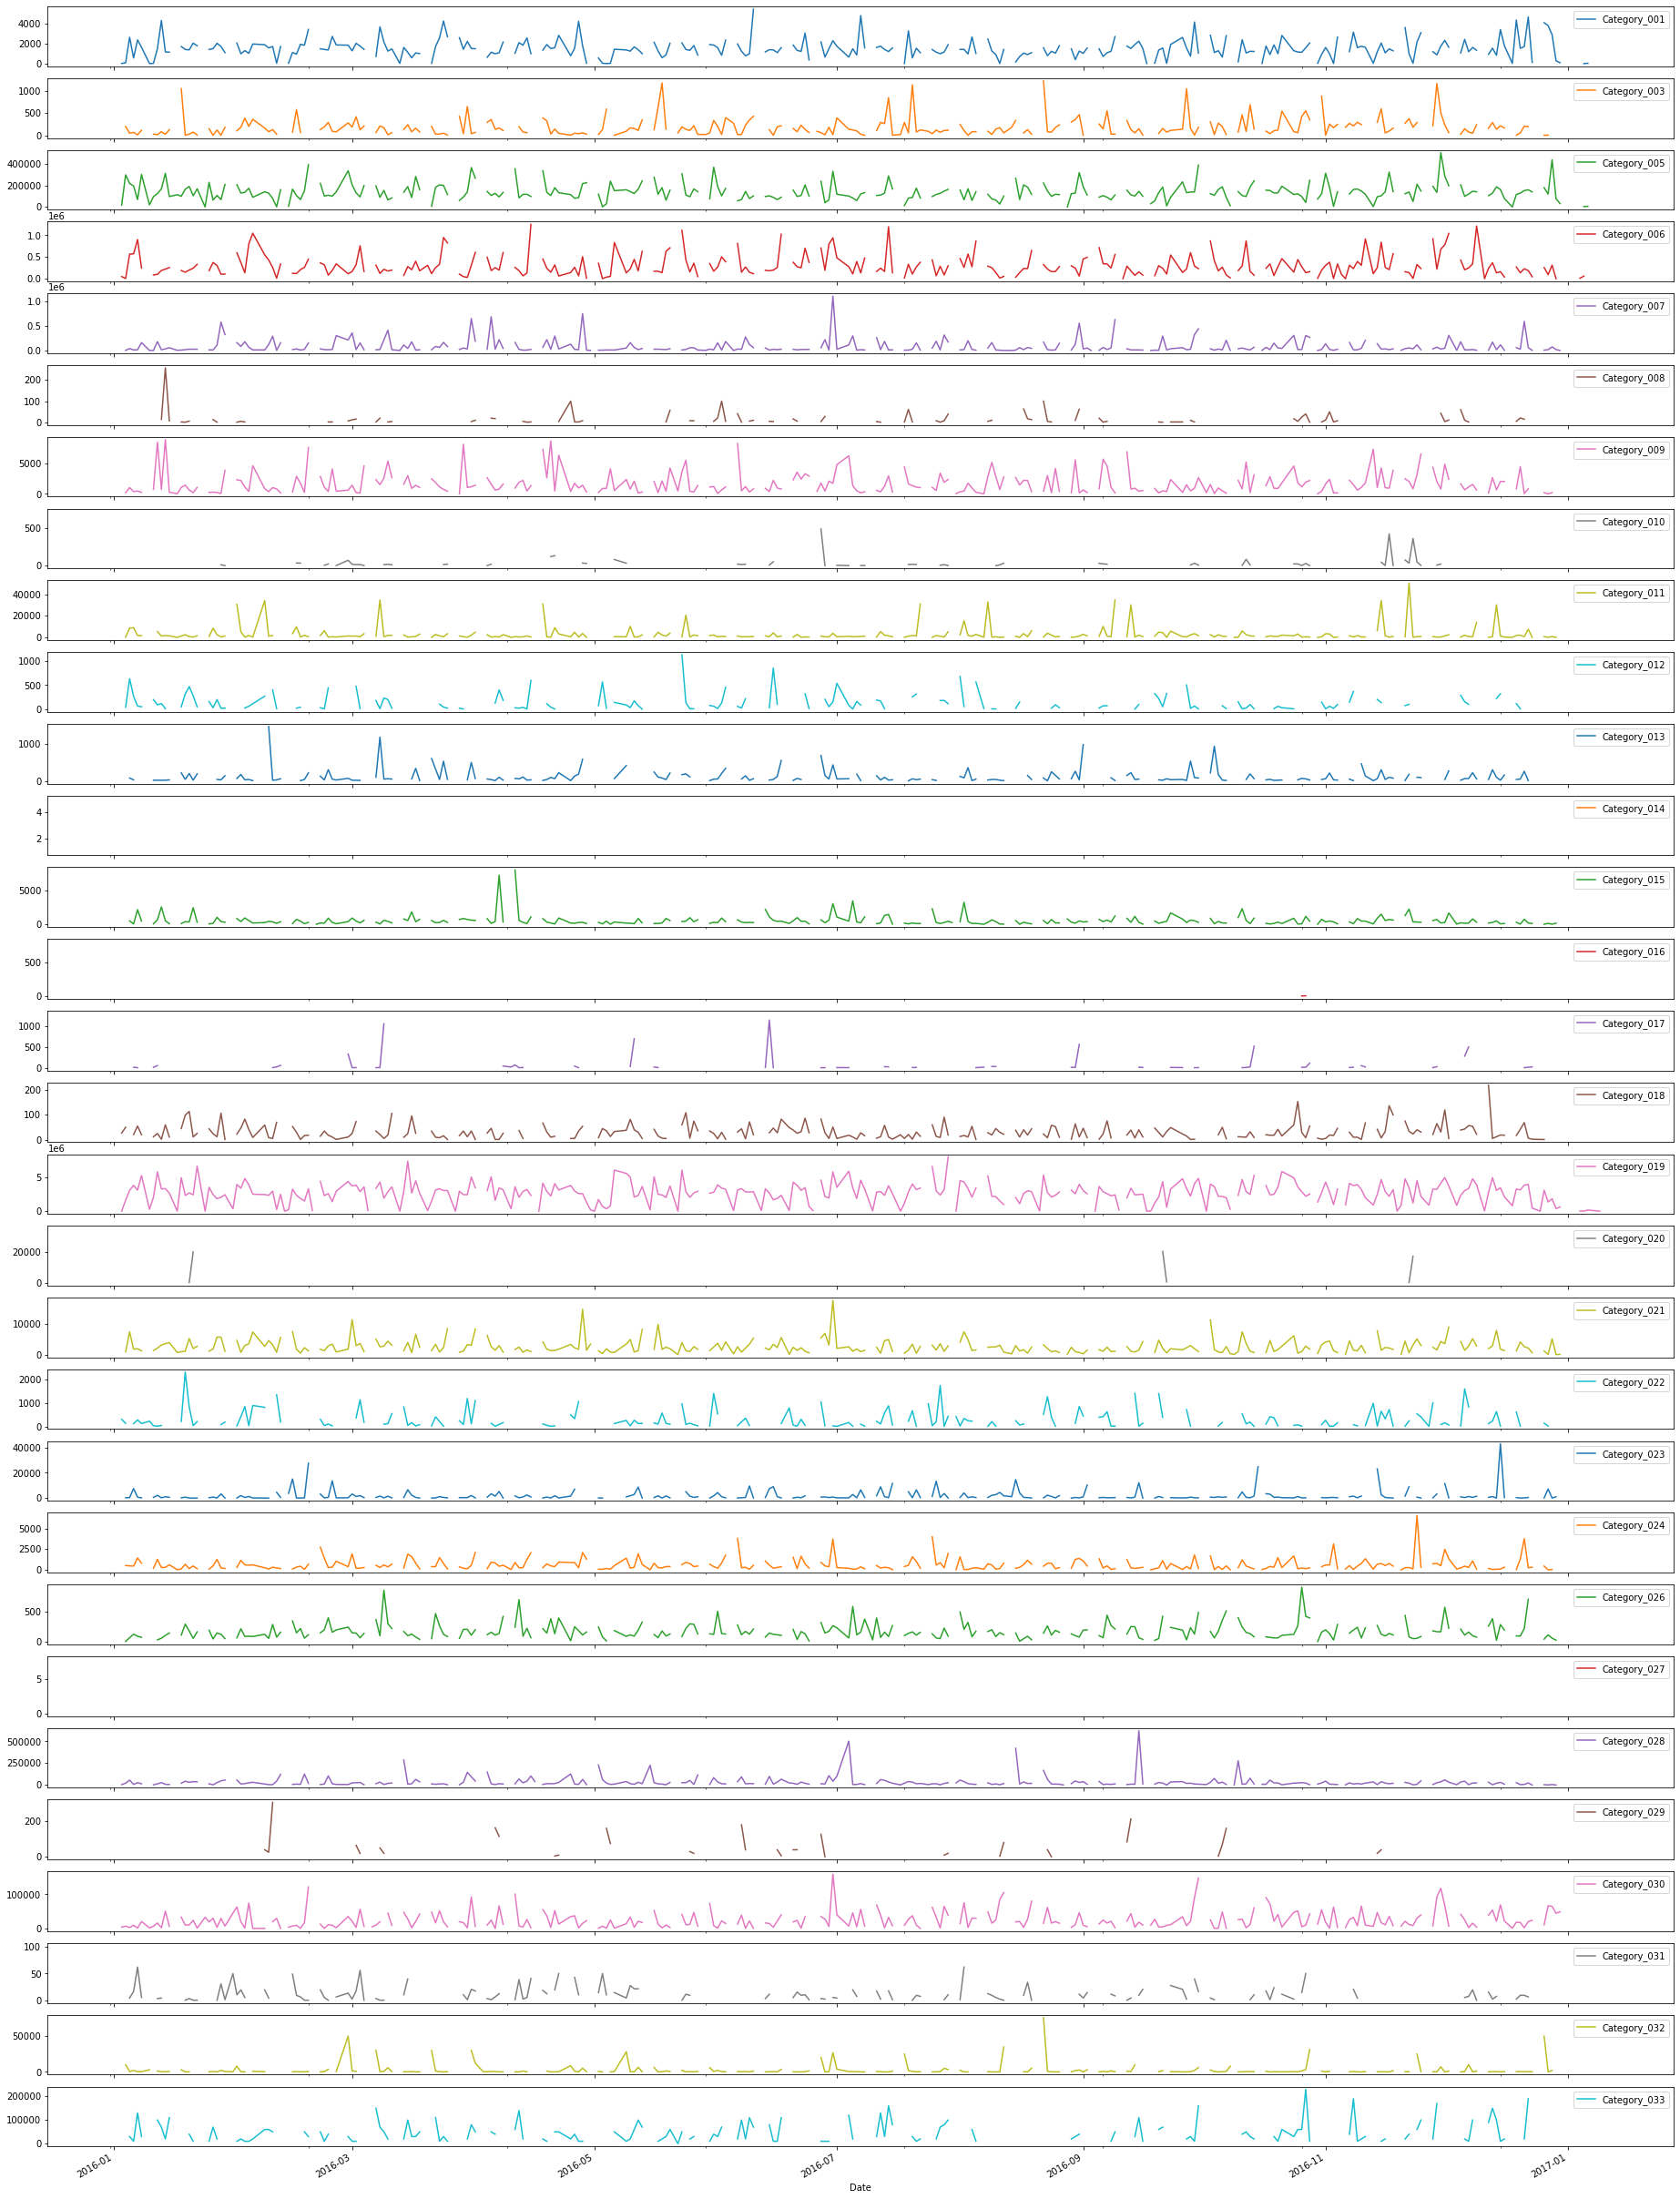

In [78]:
df_category.unstack('Product_Category').plot.line(subplots=True,figsize=(32,48))

Alright well, that's what happens when you make 32 line graphs with potentially 6 years of history. Because we are prioritized on prediction I am going to trim the data down to the past 2 years and see if that gies more readable data.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

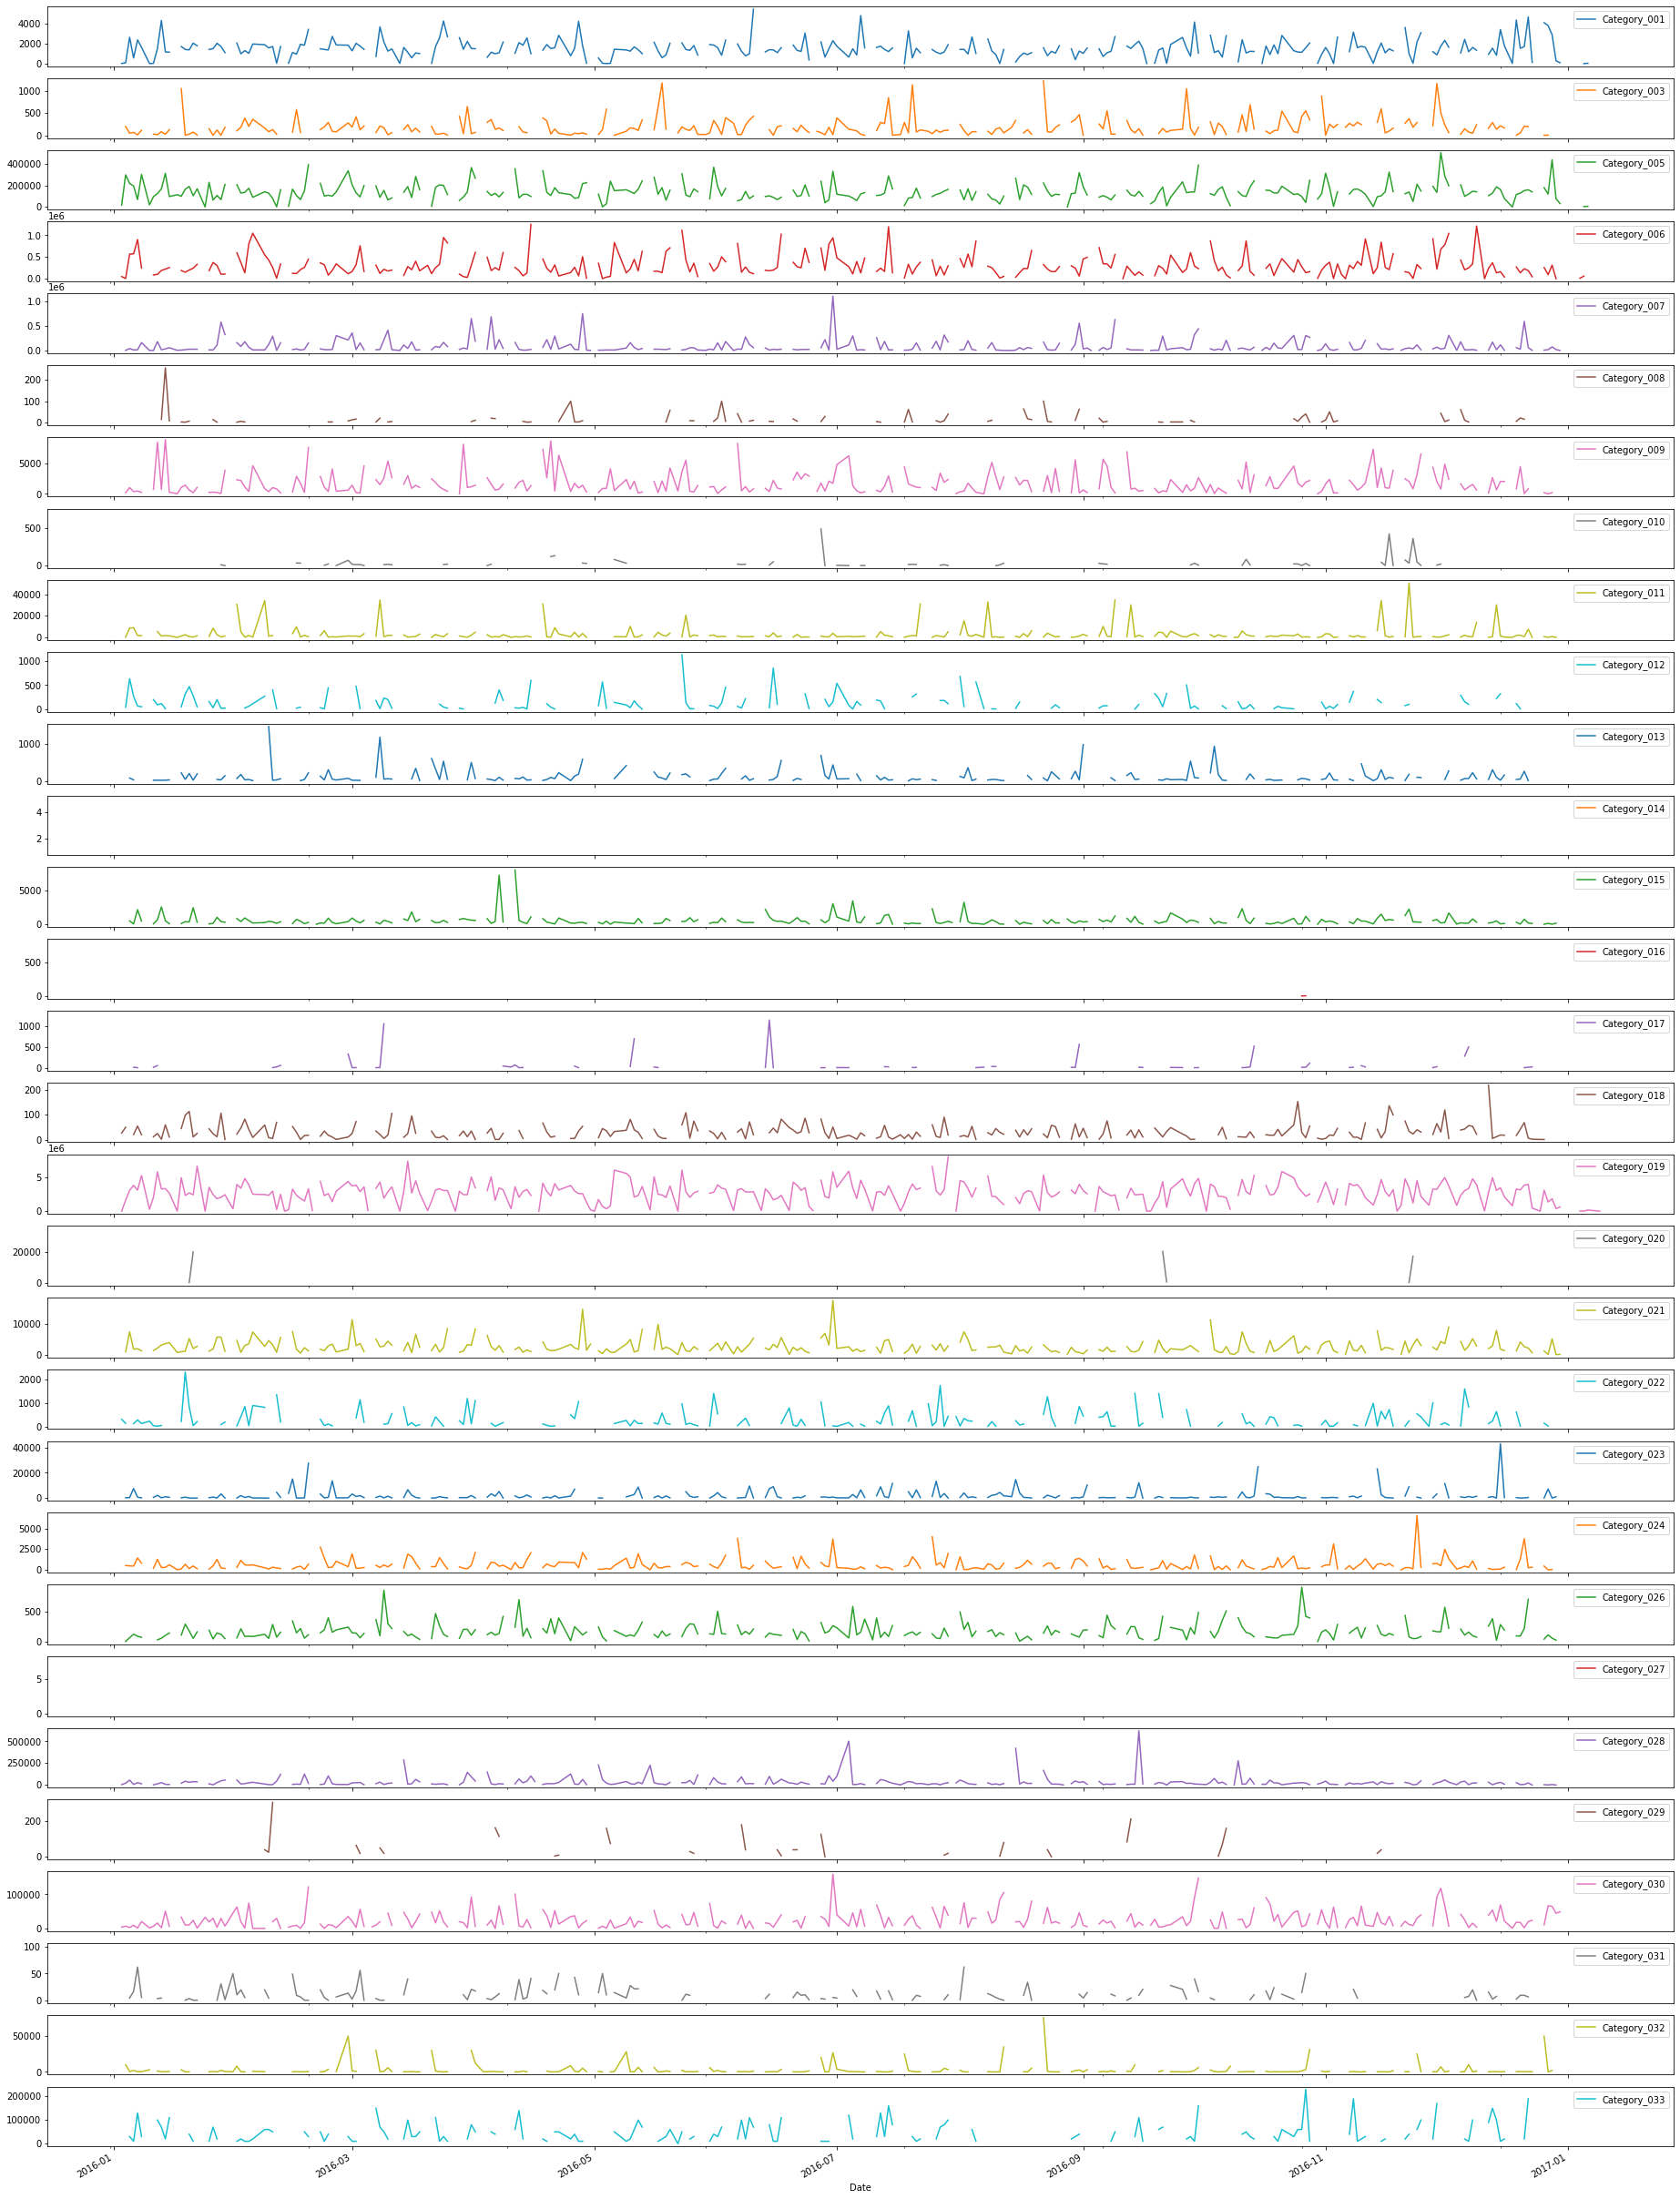

In [77]:
df_category = df[df.Year >= 2016].drop(['Year','Month','Day','Warehouse','Product_Code'],1).groupby(['Product_Category','Date'])['Order_Demand'].sum()
df_category.unstack('Product_Category').plot.line(subplots=True,figsize=(32,48))

Still a bit unreadable, lets trim down to 1 year even though that removes the extra strength in the prediction of having multiple years to generate a prediction.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

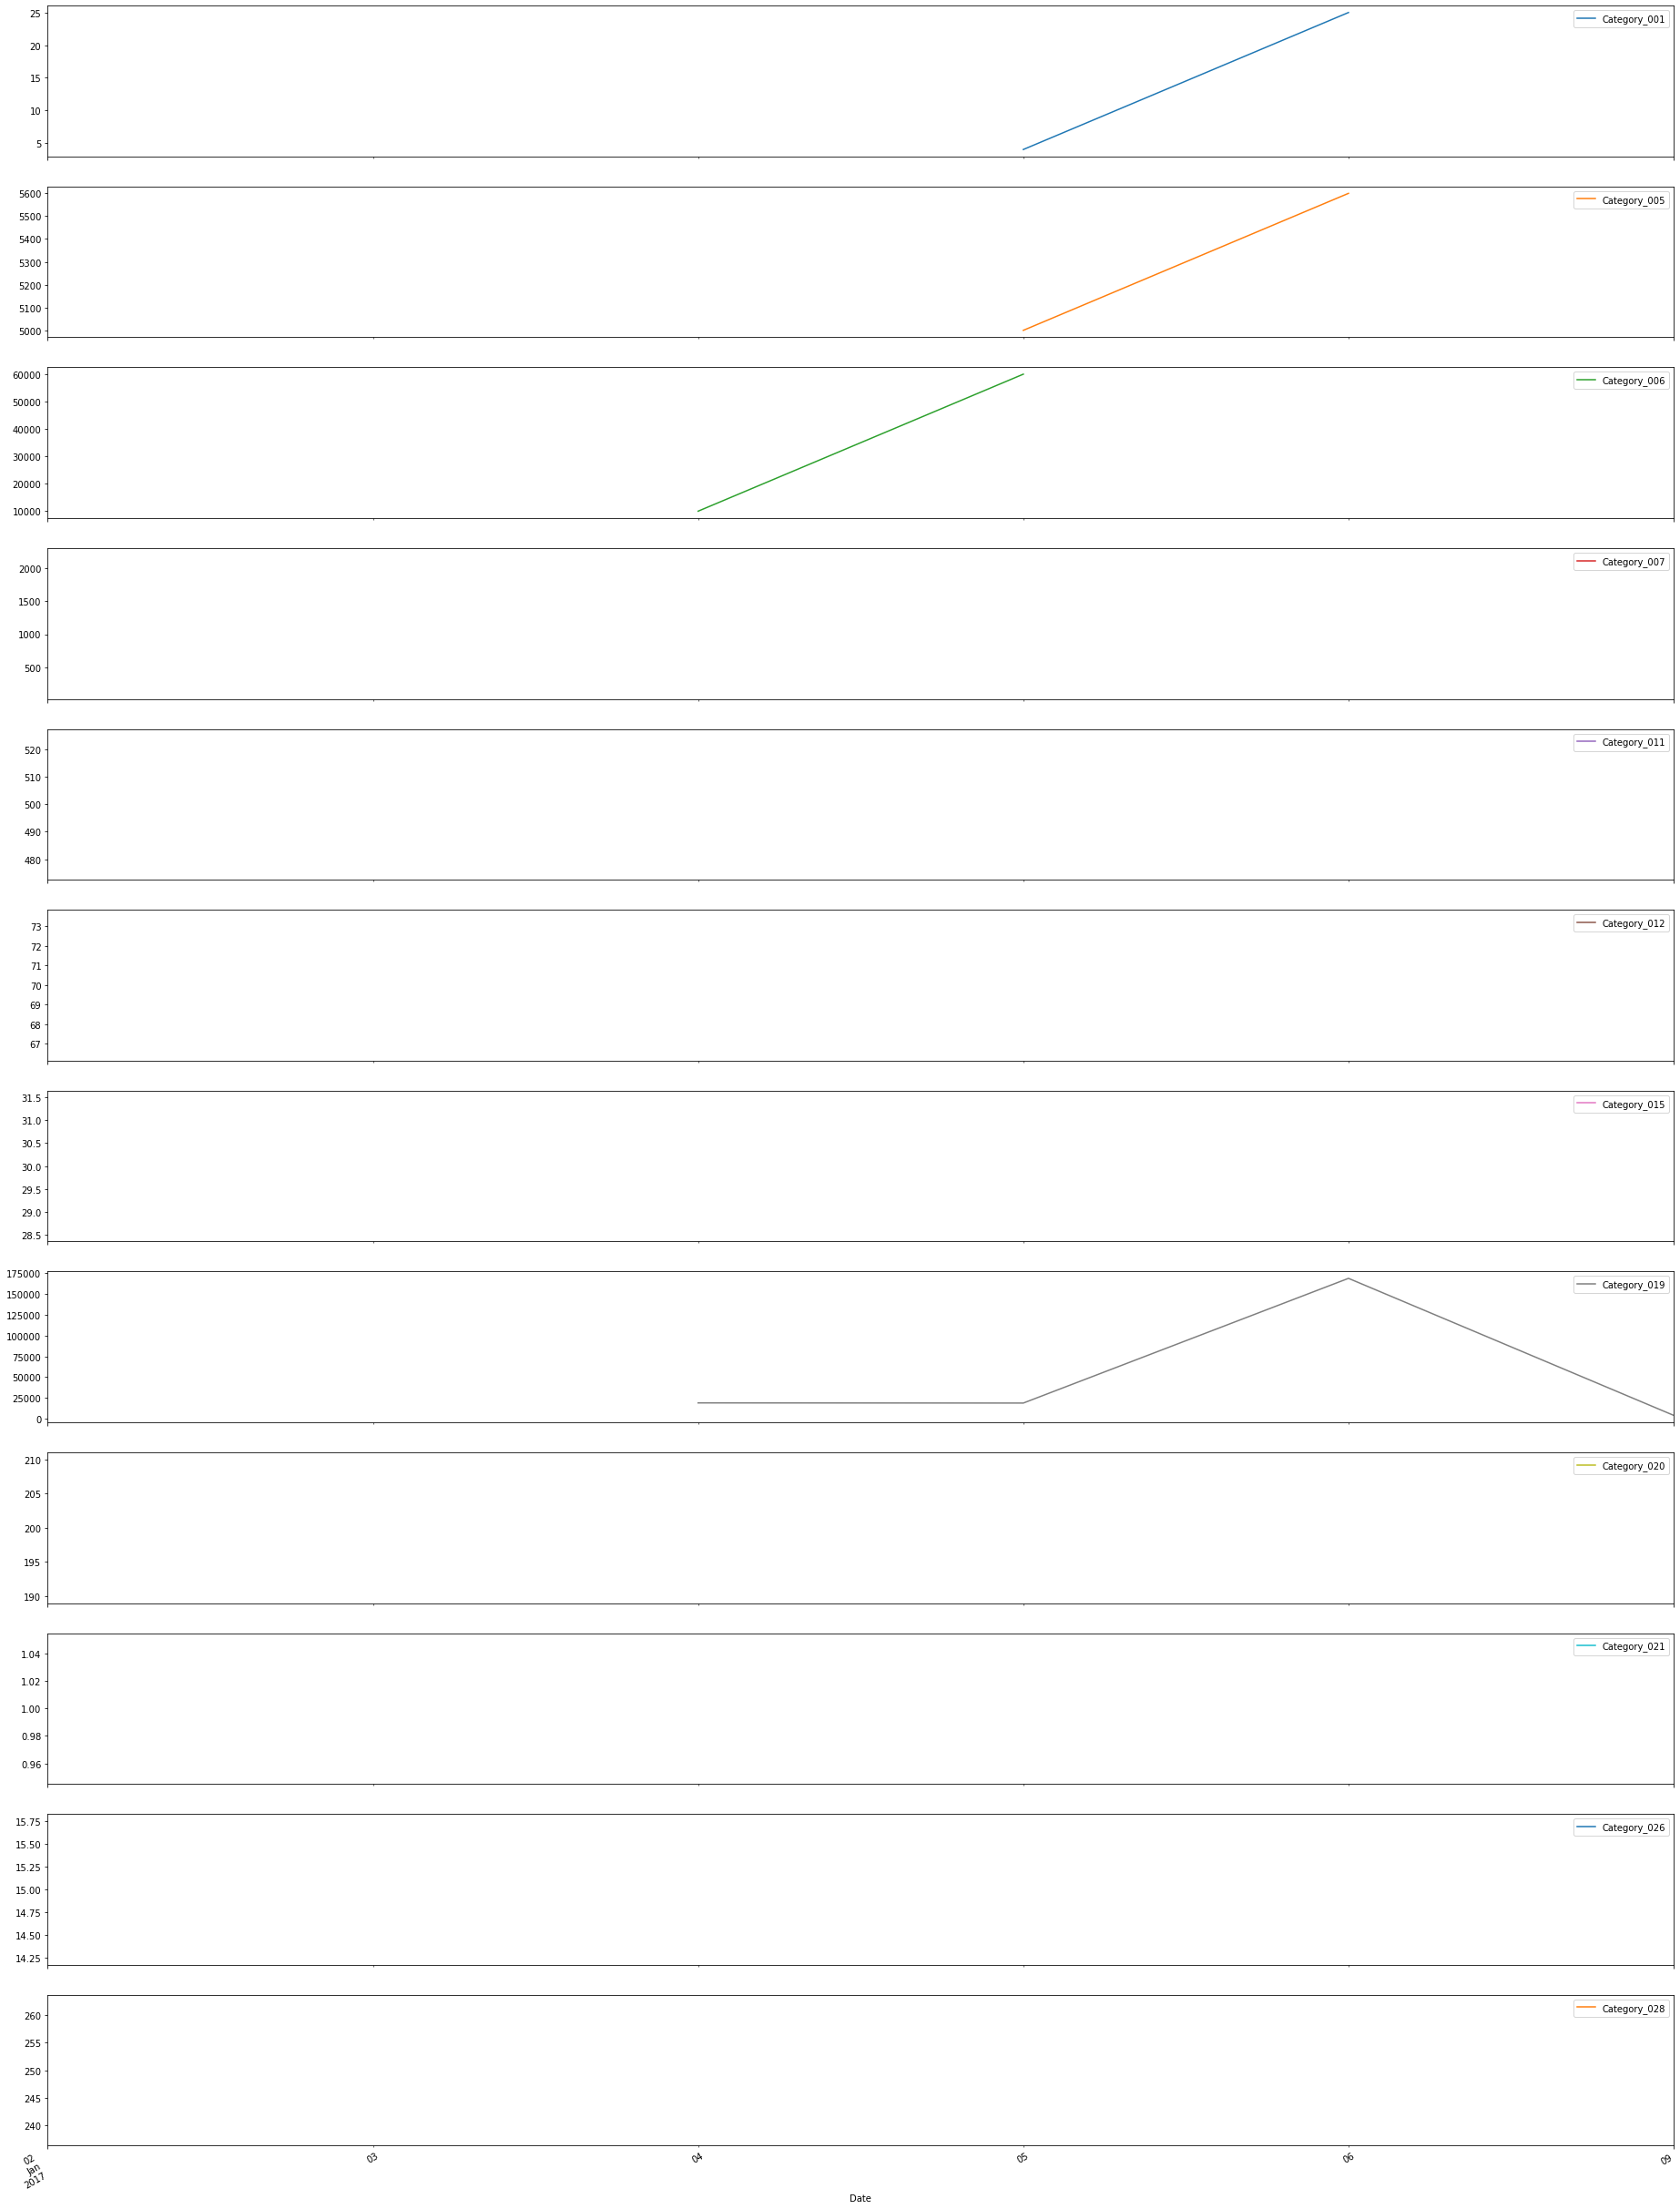

In [76]:
df_category = df[df.Year == 2017].drop(['Year','Month','Day','Warehouse','Product_Code'],1).groupby(['Product_Category','Date'])['Order_Demand'].sum()
df_category.unstack('Product_Category').plot.line(subplots=True,figsize=(32,48))

Interestingly enough the 2017 information is rather sparse. Lets take a peek at 2016 to see if the fuller data provides a more complete view. If no real trend can be drawn from 2016 then it might be suitable to move on.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

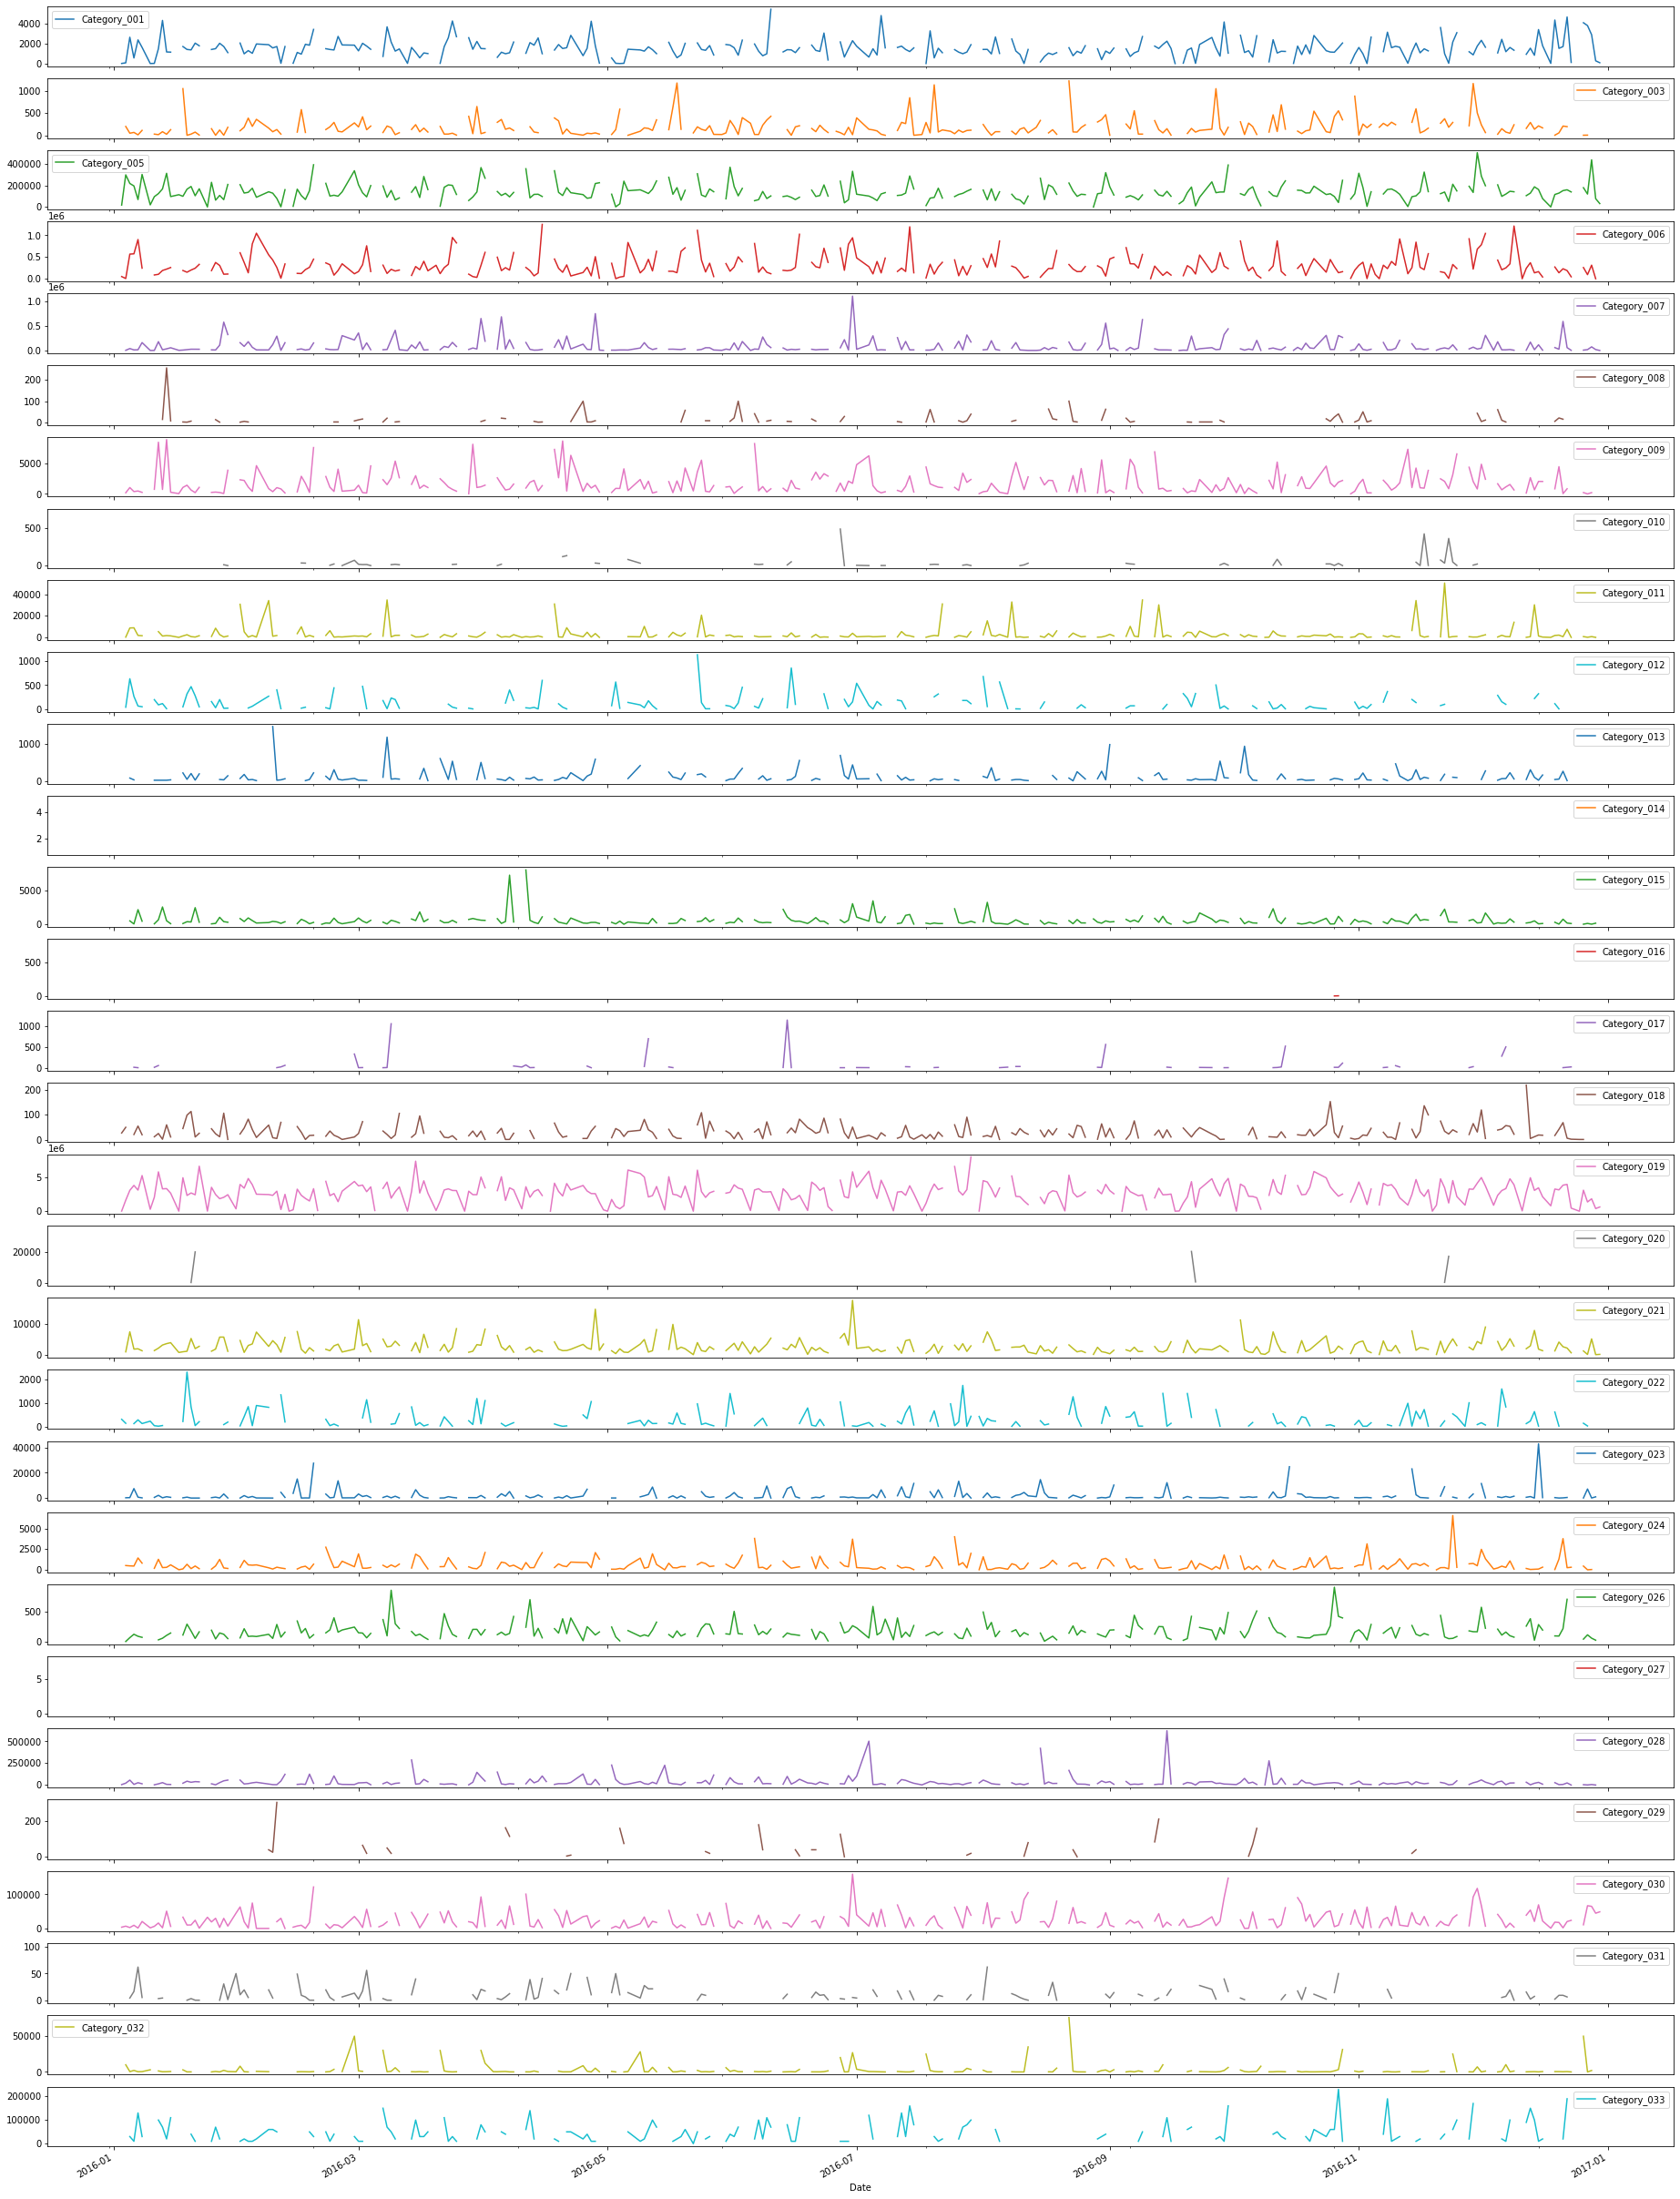

In [74]:
df_category = df[df.Year == 2016].drop(['Year','Month','Day','Warehouse','Product_Code'],1).groupby(['Product_Category','Date'])['Order_Demand'].sum()
df_category.unstack('Product_Category').plot.line(subplots=True,figsize=(32,48))

## A Brief Thought
Just a thought for the moment to consider as I continue exploring data but when considering that linear regression can fit linear models and that years are cyclic whether its 12 months in a year or 3 months to a season it might be possible to fit the data to a cyclic function and use that for prediction.